# Classfication project

In [265]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [266]:
X.head

<bound method NDFrame.head of       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020  

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
np.unique(y)

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [269]:
y

quality
0           5
1           5
2           5
3           6
4           5
...       ...
6492        6
6493        5
6494        6
6495        7
6496        6

[6497 rows x 1 columns]

In [270]:
X.shape

(6497, 11)

## Missing Values

In [272]:
X.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [273]:
y.isnull().sum()

quality    0
dtype: int64

## Outliers Handling

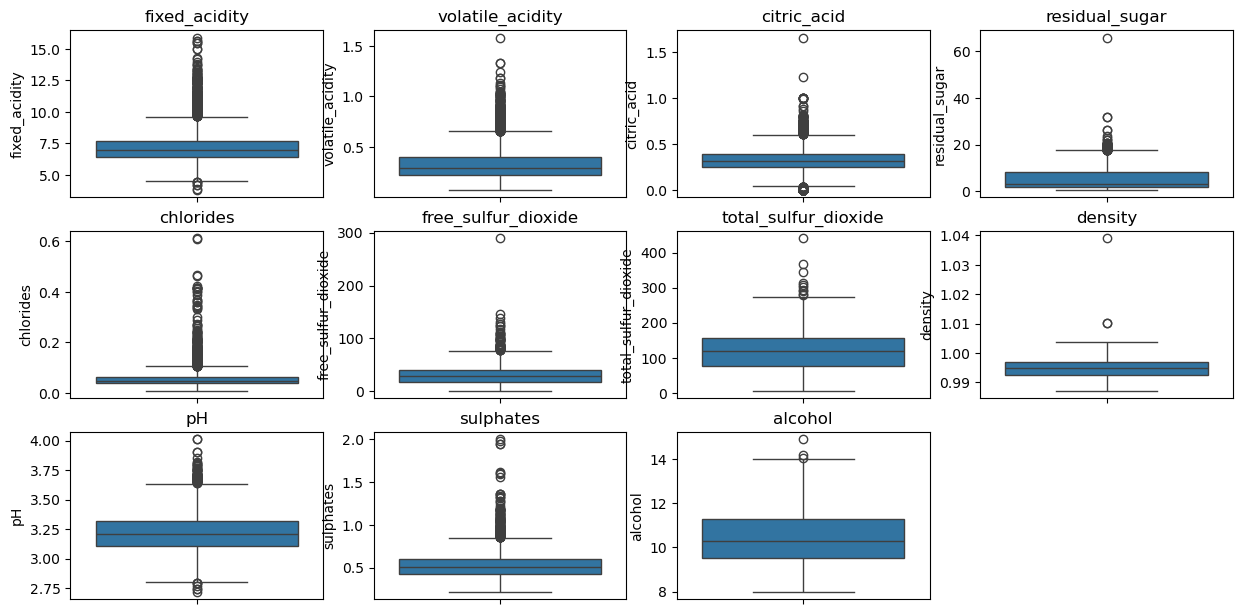

In [275]:
plt.figure(figsize=(15,10))
for i, column in enumerate(X.columns,1):
    plt.subplot(4,4,i)
    sns.boxplot(X[column])
    plt.title(column)
plt.show()

In [260]:
def remove_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    df = df[(df[column]>=lower) & (df[column]<=upper)]
    return df

In [56]:
for column in X.columns:
    X_outlier_removed = remove_outlier(X, column)

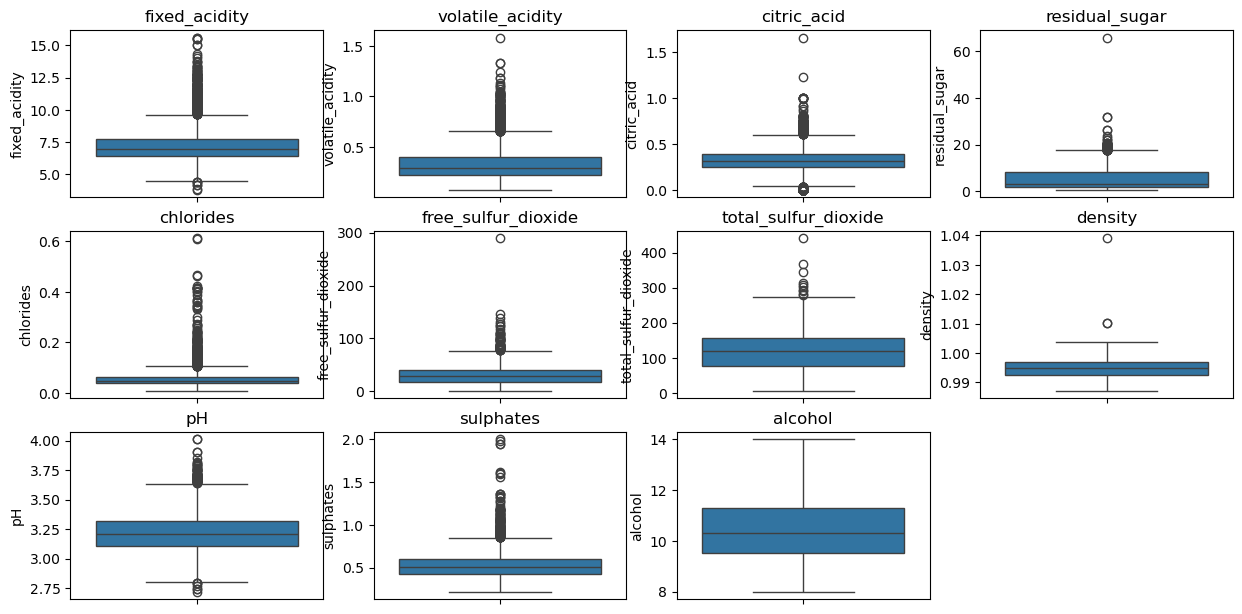

In [285]:
plt.figure(figsize=(15,10))
for i, column in enumerate(X_outlier_removed.columns,1):
    plt.subplot(4,4,i)
    sns.boxplot(X_outlier_removed[column])
    plt.title(column)
plt.show()

## Feature Engineering

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [64]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

In [66]:
X_poly = poly.fit_transform(X)

In [68]:
X.shape, X_poly.shape

((6497, 11), (6497, 77))

In [70]:
poly_features = poly.get_feature_names_out(X.columns)

In [72]:
poly_features

array(['fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed_acidity^2', 'fixed_acidity volatile_acidity',
       'fixed_acidity citric_acid', 'fixed_acidity residual_sugar',
       'fixed_acidity chlorides', 'fixed_acidity free_sulfur_dioxide',
       'fixed_acidity total_sulfur_dioxide', 'fixed_acidity density',
       'fixed_acidity pH', 'fixed_acidity sulphates',
       'fixed_acidity alcohol', 'volatile_acidity^2',
       'volatile_acidity citric_acid', 'volatile_acidity residual_sugar',
       'volatile_acidity chlorides',
       'volatile_acidity free_sulfur_dioxide',
       'volatile_acidity total_sulfur_dioxide',
       'volatile_acidity density', 'volatile_acidity pH',
       'volatile_acidity sulphates', 'volatile_acidity alcohol',
       'citric_acid^2', 'citric_acid residual_sugar',
       'citric_acid chlorides', 'citric_acid fre

## Feature Selection

In [75]:
from sklearn.feature_selection import SelectKBest, f_classif

In [76]:
k = 50
selecter = SelectKBest(f_classif, k=k)
X_selected = selecter.fit_transform(X_poly, y)

C:\Users\thaku\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [79]:
y.shape

(6497, 1)

In [81]:
y.ndim

2

In [83]:
type(y)

pandas.core.frame.DataFrame

In [85]:
y = y.values

In [87]:
type(y)

numpy.ndarray

In [89]:
y.ravel()

array([5, 5, 5, ..., 6, 7, 6], dtype=int64)

In [91]:
y.ndim

2

In [93]:
y= y.flatten()

In [95]:
y.ndim

1

In [97]:
y

array([5, 5, 5, ..., 6, 7, 6], dtype=int64)

In [99]:
y.shape

(6497,)

In [101]:
X_selected.shape

(6497, 50)

In [103]:
X.shape

(6497, 11)

In [105]:
X.describe().T

count        mean        std      min       25%  \
fixed_acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile_acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric_acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual_sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free_sulfur_dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total_sulfur_dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   

                            50%        75%        max  
fixed_acidity           7.00000    7.70000   15.90000  
volatile_acidity        0.29000    0.40000    1.58000  
citric_acid             0.31000    0.39000    1.66000  
residual_sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free_sulfur_dioxide    29.00000   41.00000  289.00000  
total_sulfur_dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000

## Histogram distribution KDE plot

In [180]:
X.head(3)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  
0      9.4  
1      9.8  
2      9.8

<Axes: xlabel='fixed_acidity', ylabel='Count'>

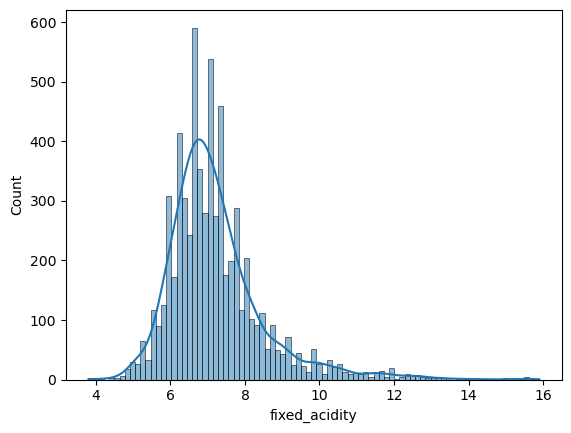

In [184]:
sns.histplot(data = X, x='fixed_acidity', kde=True)

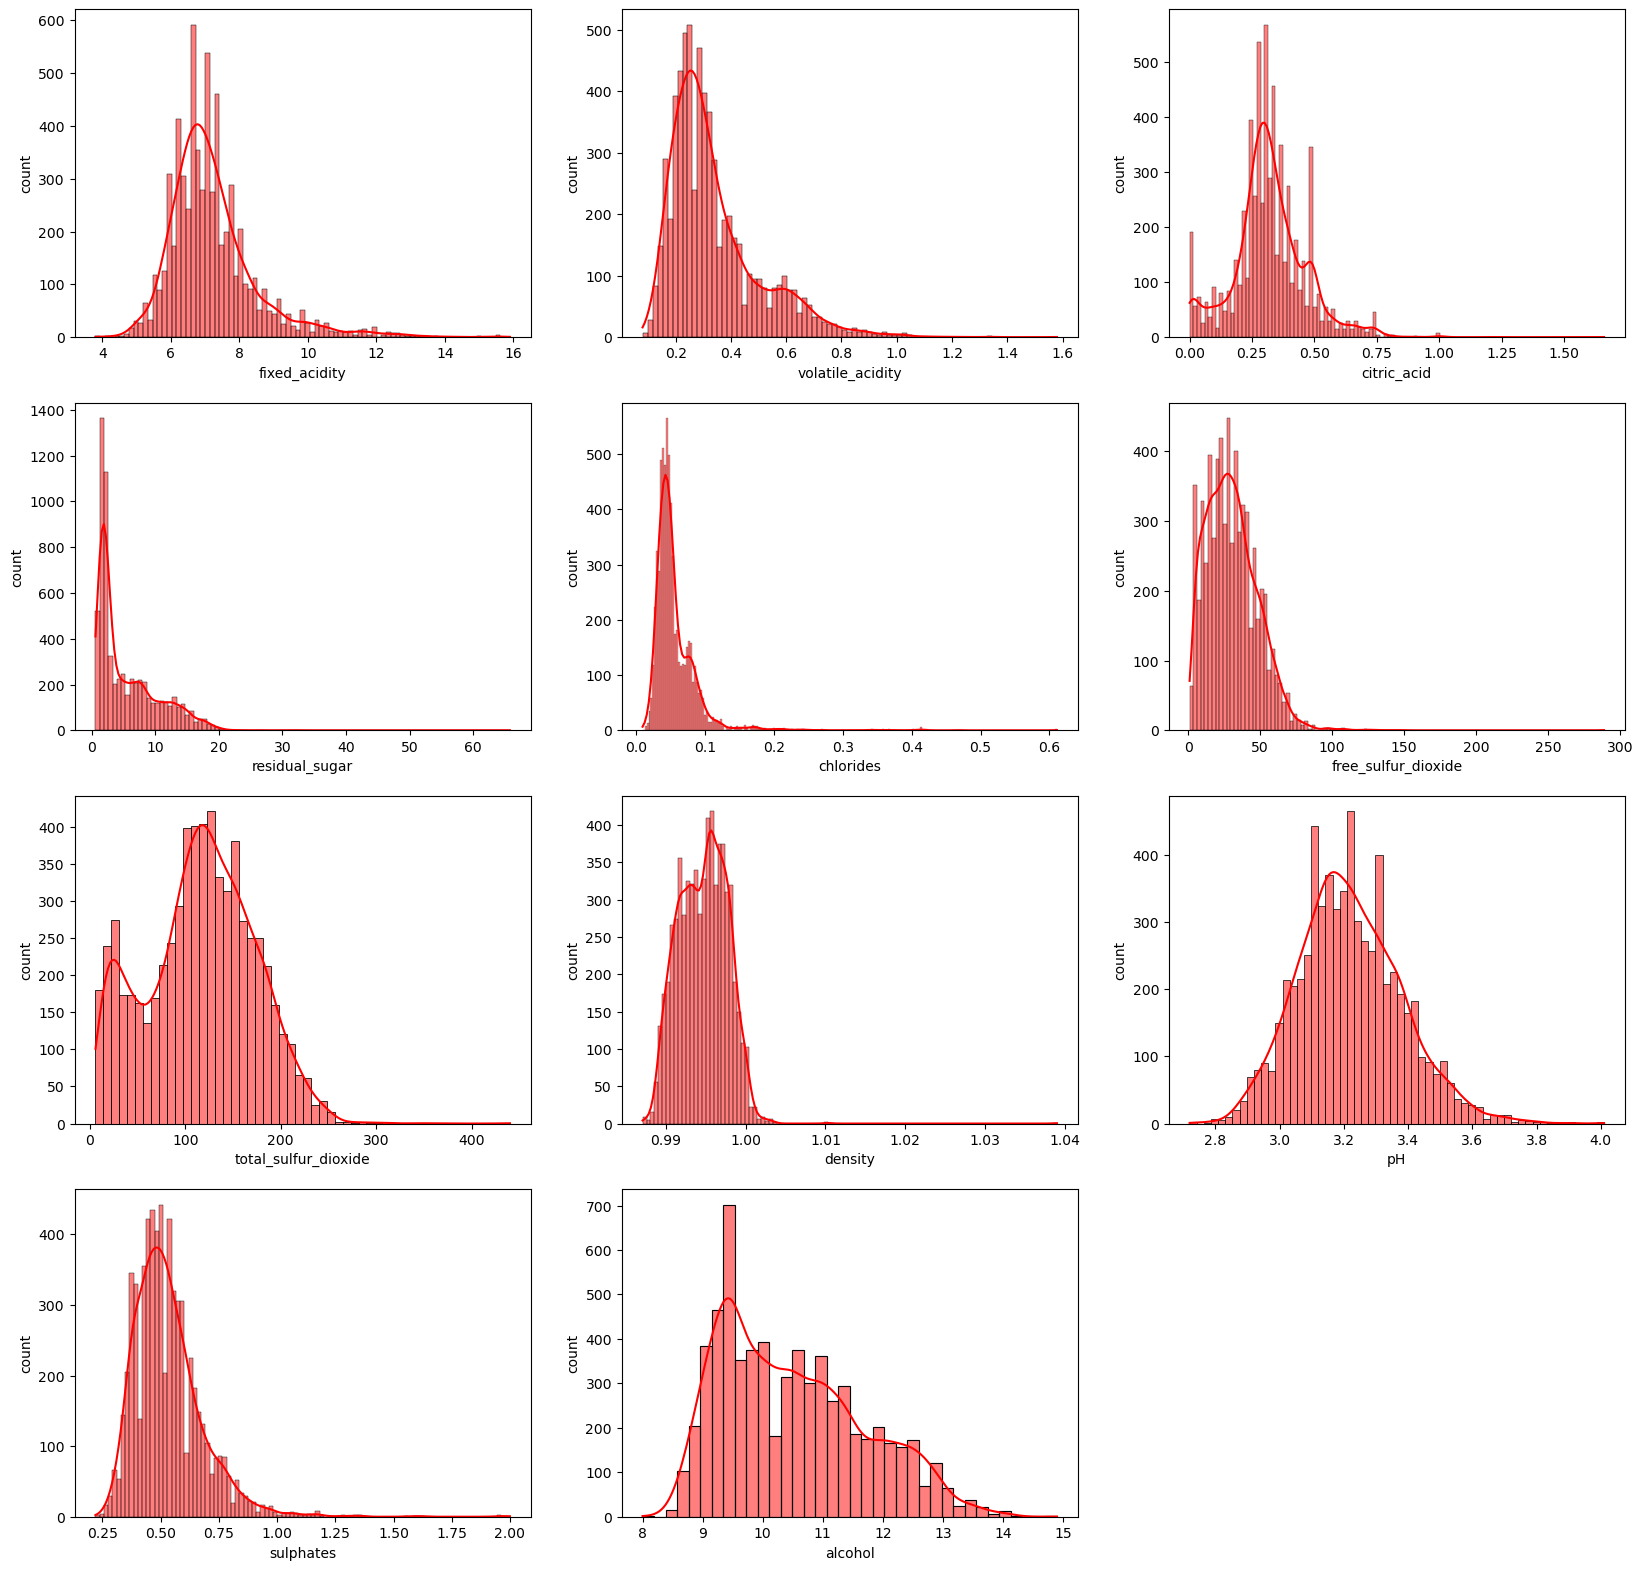

In [213]:
num_features = X.shape[1]
num_cols = 3
num_row = (num_features*2+num_cols-1)//num_cols
plt.figure(figsize=(20, num_row*5))
for i, feature in enumerate(X):
    plt.subplot(num_row, num_cols, i+1)
    sns.histplot(X[feature], color='red', kde=True)
    plt.xlabel(feature)
    plt.ylabel("count")
plt.savefig("histogram1.png", dpi=600)
plt.show()

## Correlation plots

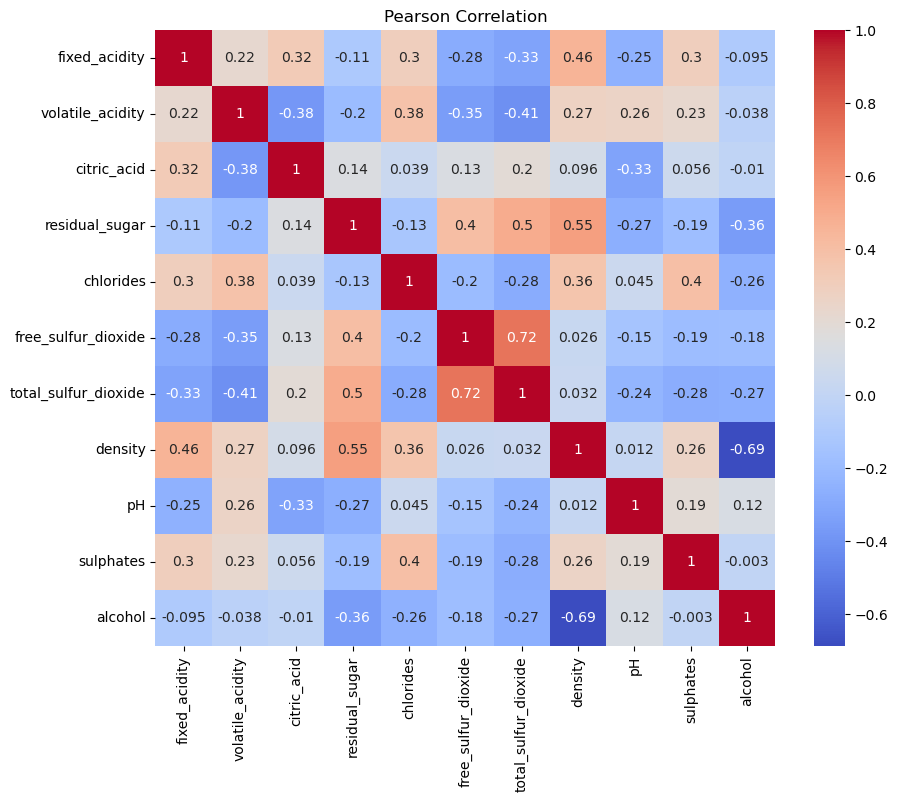

In [201]:

corr_mat = corr_mat = X.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation")
plt.savefig("Pearson1.png", dpi=900)

Text(0.5, 1.0, 'Spearman Correlation')

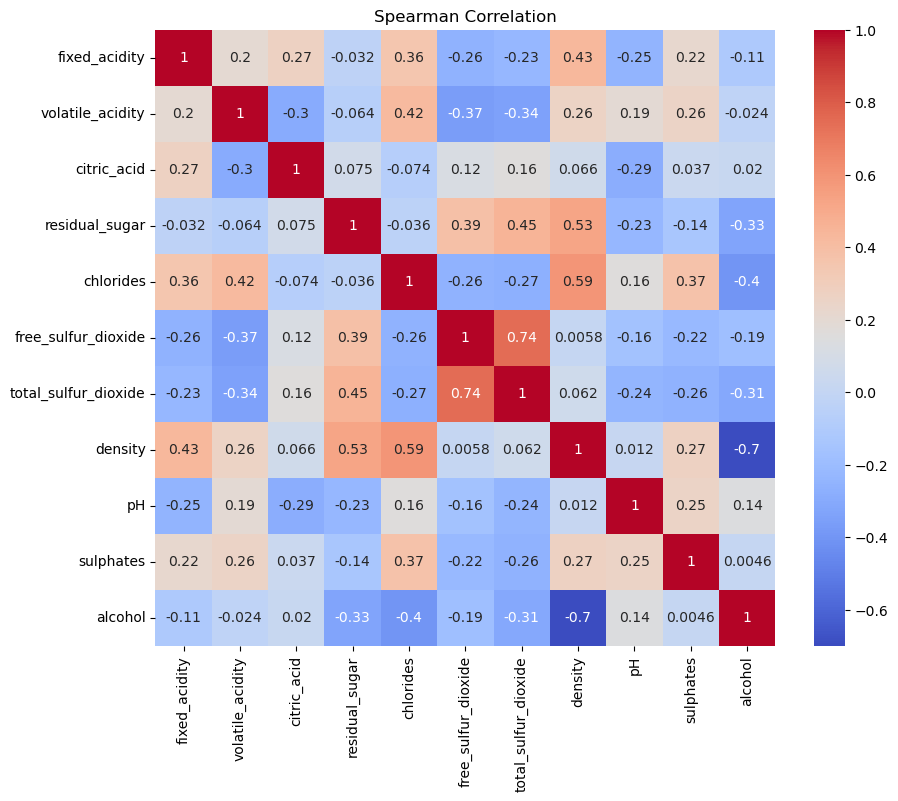

In [211]:
corr_mat = X.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title("Spearman Correlation")

## Pair plot

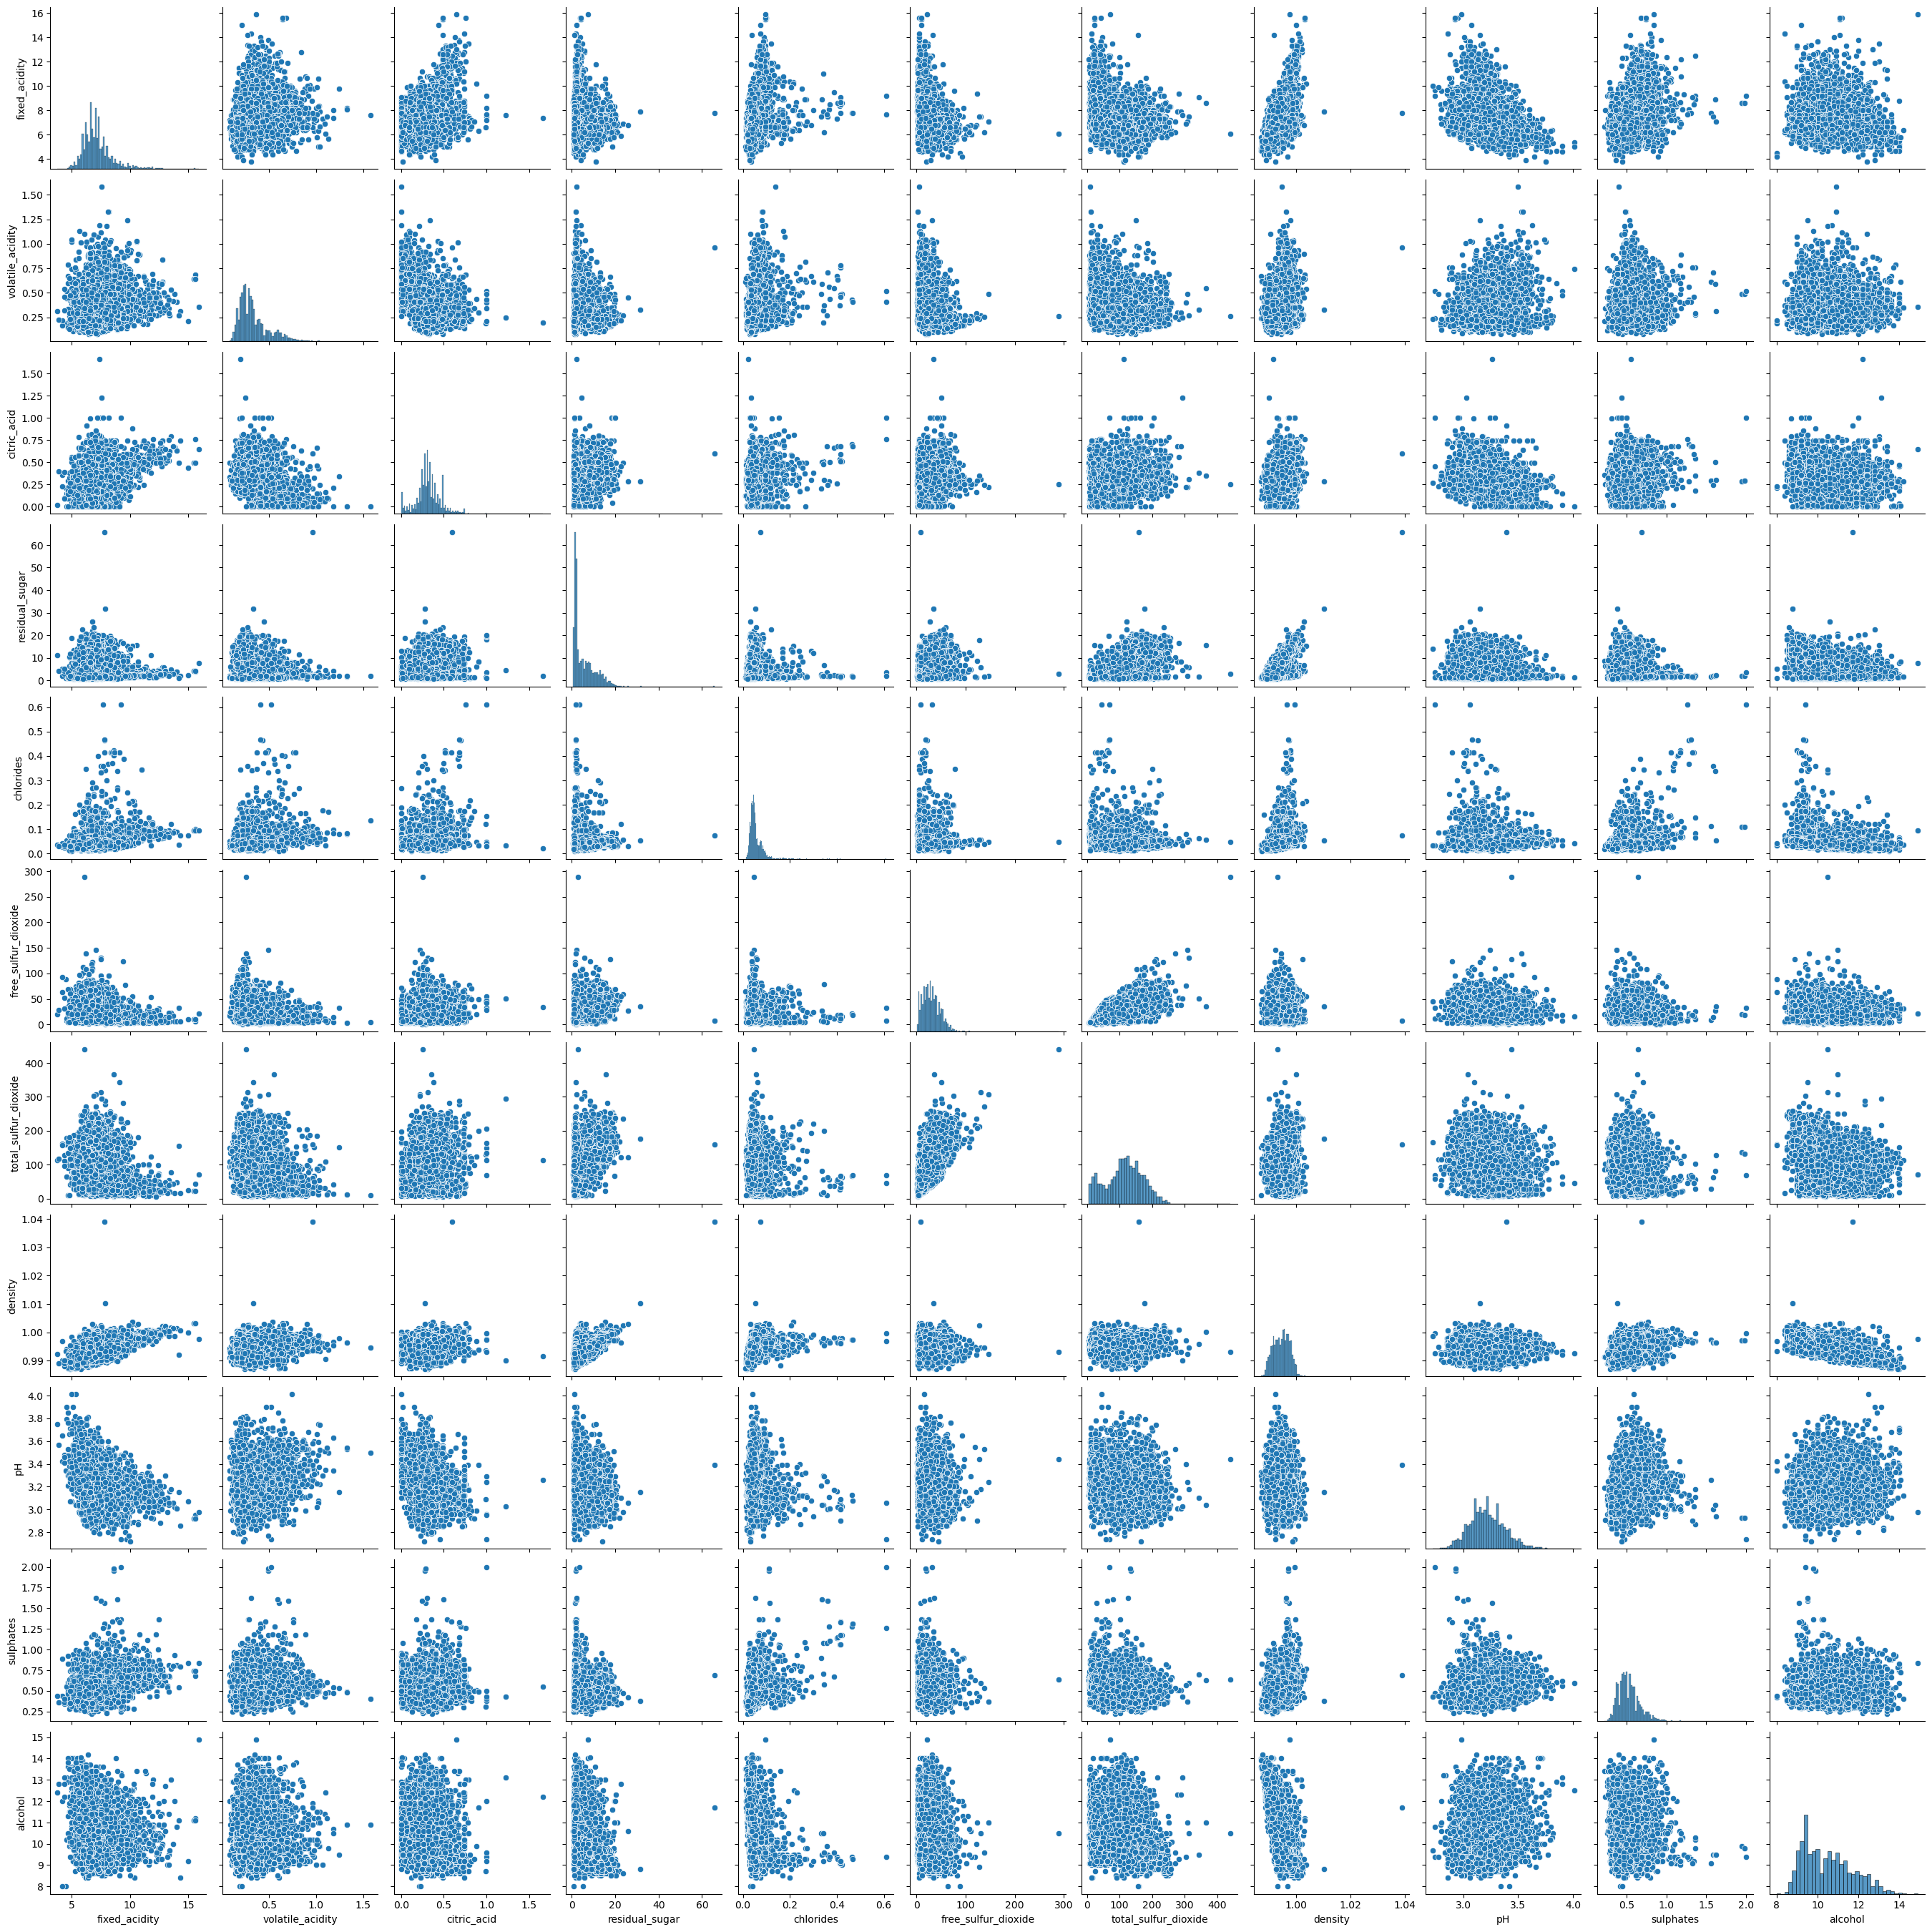

In [207]:
sns.pairplot(X)

## Feature Scaling

In [216]:
X_selected.min(axis=1)

array([0.      , 0.      , 0.008464, ..., 0.001681, 0.000484, 0.0004  ])

In [218]:
X_selected.max(axis=1)

array([ 1156.,  4489.,  2916., ..., 12321., 12100.,  9604.])

## Model selection and training, Cross validation

In [220]:
X.head(5)


fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [222]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [224]:
model = DecisionTreeRegressor()

In [226]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [240]:
X = np.array(X)
y = np.array(y)

train_data = []
test_data = []
actual_pred = []
kf = KFold(n_splits=5, shuffle=True, random_state=1)
fold = 1

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    actual_pred.append({"Fold": fold, "Actual": y_test, "Prediction": test_pred})
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_score = r2_score(y_train, train_pred)
    test_score = r2_score(y_test, test_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    train_data.append({"Fold": fold, "MSE": train_mse, "Score": train_score, "MAE": train_mae})
    test_data.append({"Fold": fold, "MSE": test_mse, "Score": test_score, "MAE": test_mae})
    fold += 1

# Convert results to DataFrame for better visualization
import pandas as pd

train_data_df = pd.DataFrame(train_data)
test_data_df = pd.DataFrame(test_data)

print("Train Data Metrics:")
print(train_data_df)
print("\nTest Data Metrics:")
print(test_data_df)

Train Data Metrics:
   Fold  MSE  Score  MAE
0     1  0.0    1.0  0.0
1     2  0.0    1.0  0.0
2     3  0.0    1.0  0.0
3     4  0.0    1.0  0.0
4     5  0.0    1.0  0.0

Test Data Metrics:
   Fold       MSE     Score       MAE
0     1  0.680769  0.064156  0.488462
1     2  0.676923  0.110571  0.478462
2     3  0.743649  0.042559  0.506543
3     4  0.648961  0.085437  0.476520
4     5  0.755196  0.093138  0.498075


In [242]:
train_data_df = pd.DataFrame(train_data)
test_data_df = pd.DataFrame(test_data)

In [244]:
train_data_df

Fold  MSE  Score  MAE
0     1  0.0    1.0  0.0
1     2  0.0    1.0  0.0
2     3  0.0    1.0  0.0
3     4  0.0    1.0  0.0
4     5  0.0    1.0  0.0

In [246]:
test_data_df.mean()

Fold     3.000000
MSE      0.701100
Score    0.079172
MAE      0.489612
dtype: float64

In [248]:
actual_pred_df = pd.DataFrame(actual_pred)

In [250]:
actual_pred_df

Fold                                             Actual  \
0     1  [5, 5, 5, 6, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, ...   
1     2  [5, 6, 5, 5, 5, 5, 7, 5, 6, 5, 7, 5, 6, 5, 5, ...   
2     3  [5, 7, 5, 5, 5, 5, 5, 6, 6, 4, 5, 5, 5, 5, 5, ...   
3     4  [5, 7, 5, 5, 6, 5, 5, 4, 5, 5, 6, 5, 5, 6, 5, ...   
4     5  [5, 5, 5, 4, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, ...   

                                          Prediction  
0  [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 6.0, ...  
1  [4.0, 6.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, ...  
2  [5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 6.0, 5.0, 6.0, ...  
3  [5.0, 6.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...  
4  [6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 7.0, ...

Text(0, 0.5, 'Predictions')

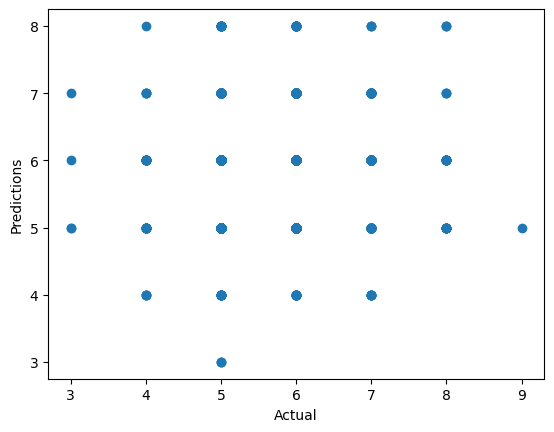

In [252]:
plt.scatter(actual_pred_df.iloc[0,1], actual_pred_df.iloc[1,2])
plt.xlabel("Actual")
plt.ylabel("Predictions")

In [254]:
actual_pred_df.iloc[0,1].shape

(1300,)

In [256]:
actual_pred_df.iloc[1,2].shape

(1300,)

### Dataset Splitting

In [115]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [119]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [121]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_selected, y, test_size=0.2, random_state=42)

### Model training

In [230]:
from sklearn.tree import DecisionTreeClassifier

In [232]:
model1 = DecisionTreeClassifier() # for original X
model2 = DecisionTreeClassifier() # for X_poly
model3 = DecisionTreeClassifier() # for X_selected

In [234]:
model1.fit(X_train, y_train) # for original X
model2.fit(X_train_1, y_train_1) # for X_poly
model3.fit(X_train_2, y_train_2) # for X_selected

DecisionTreeClassifier()

### Confusion Matrix

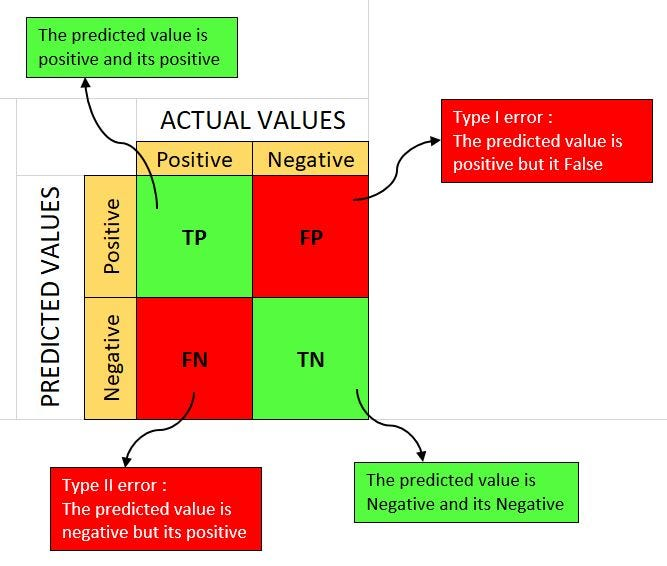

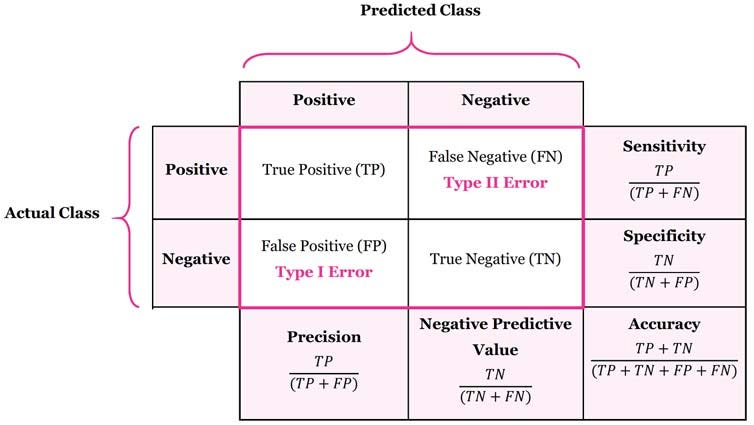

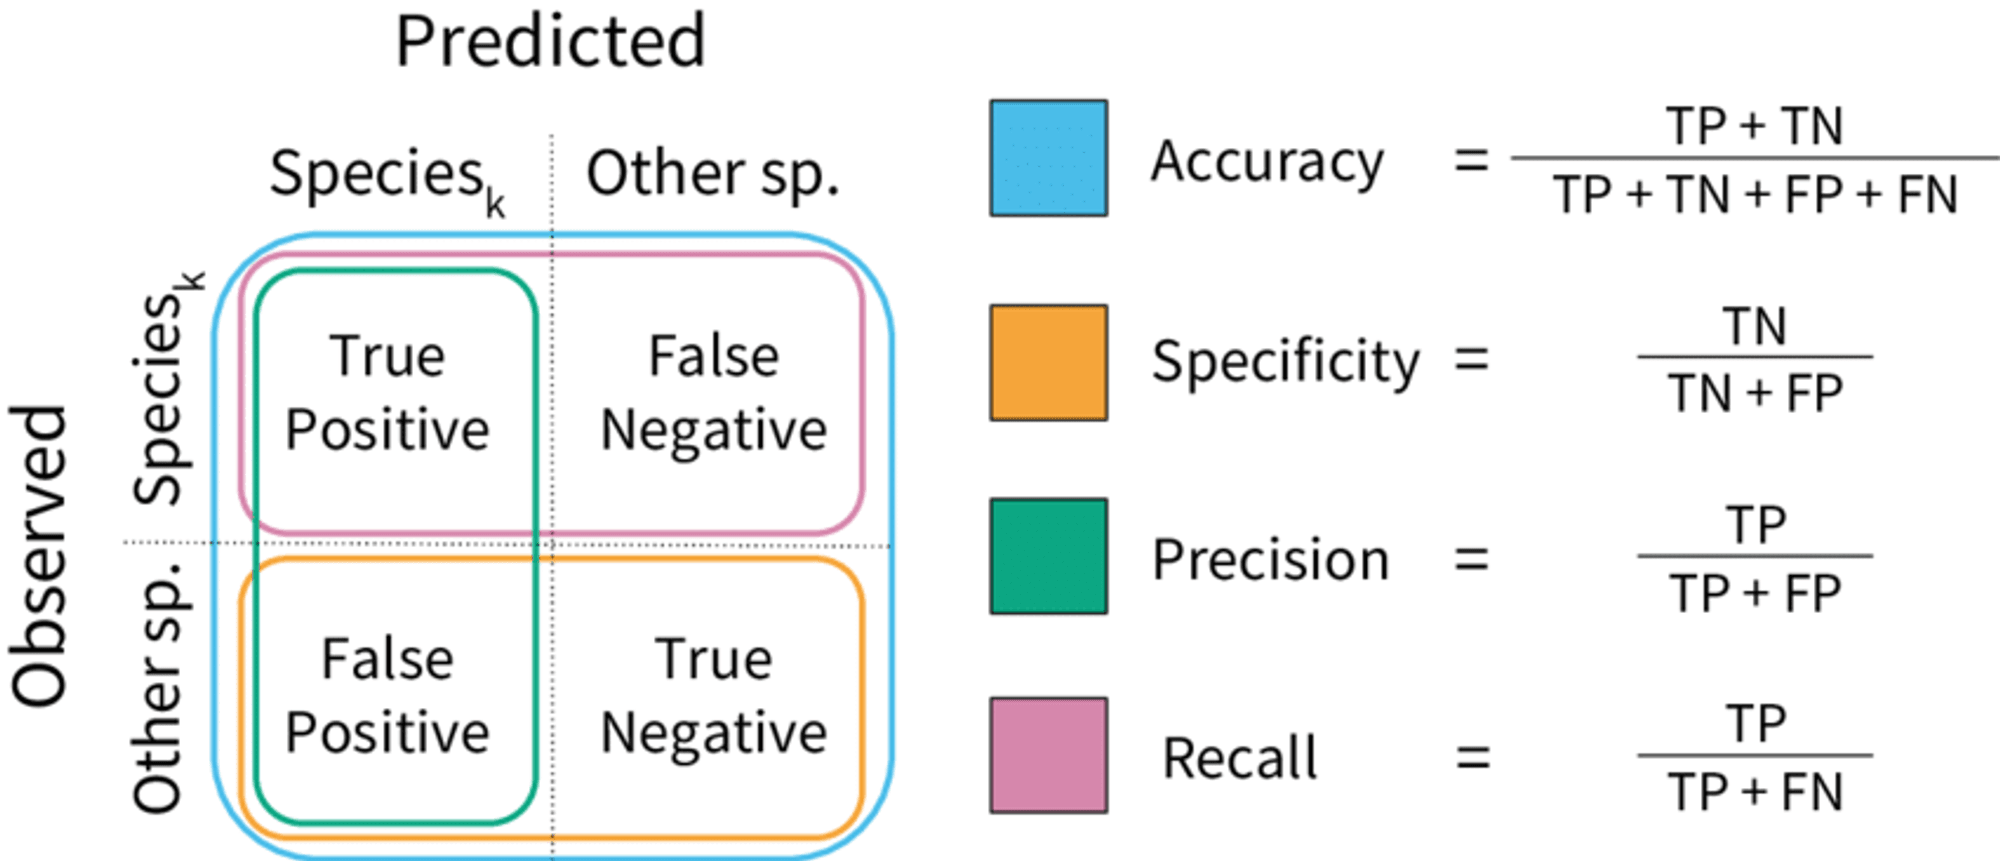

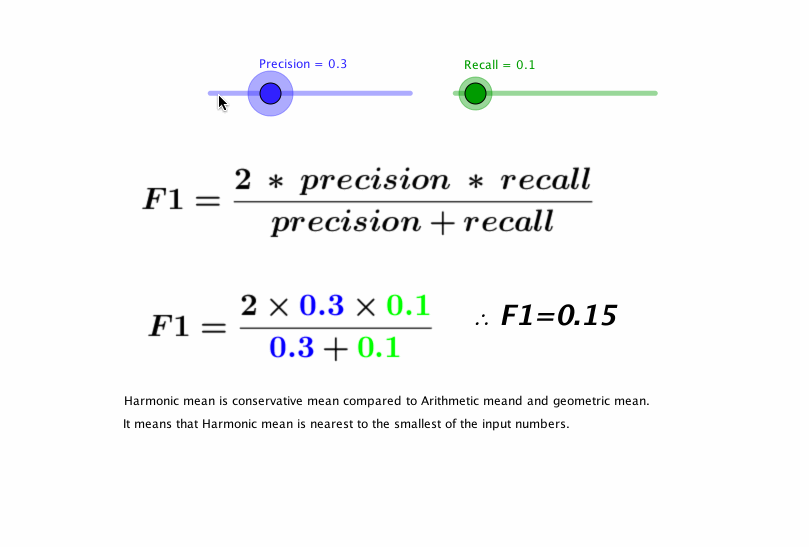

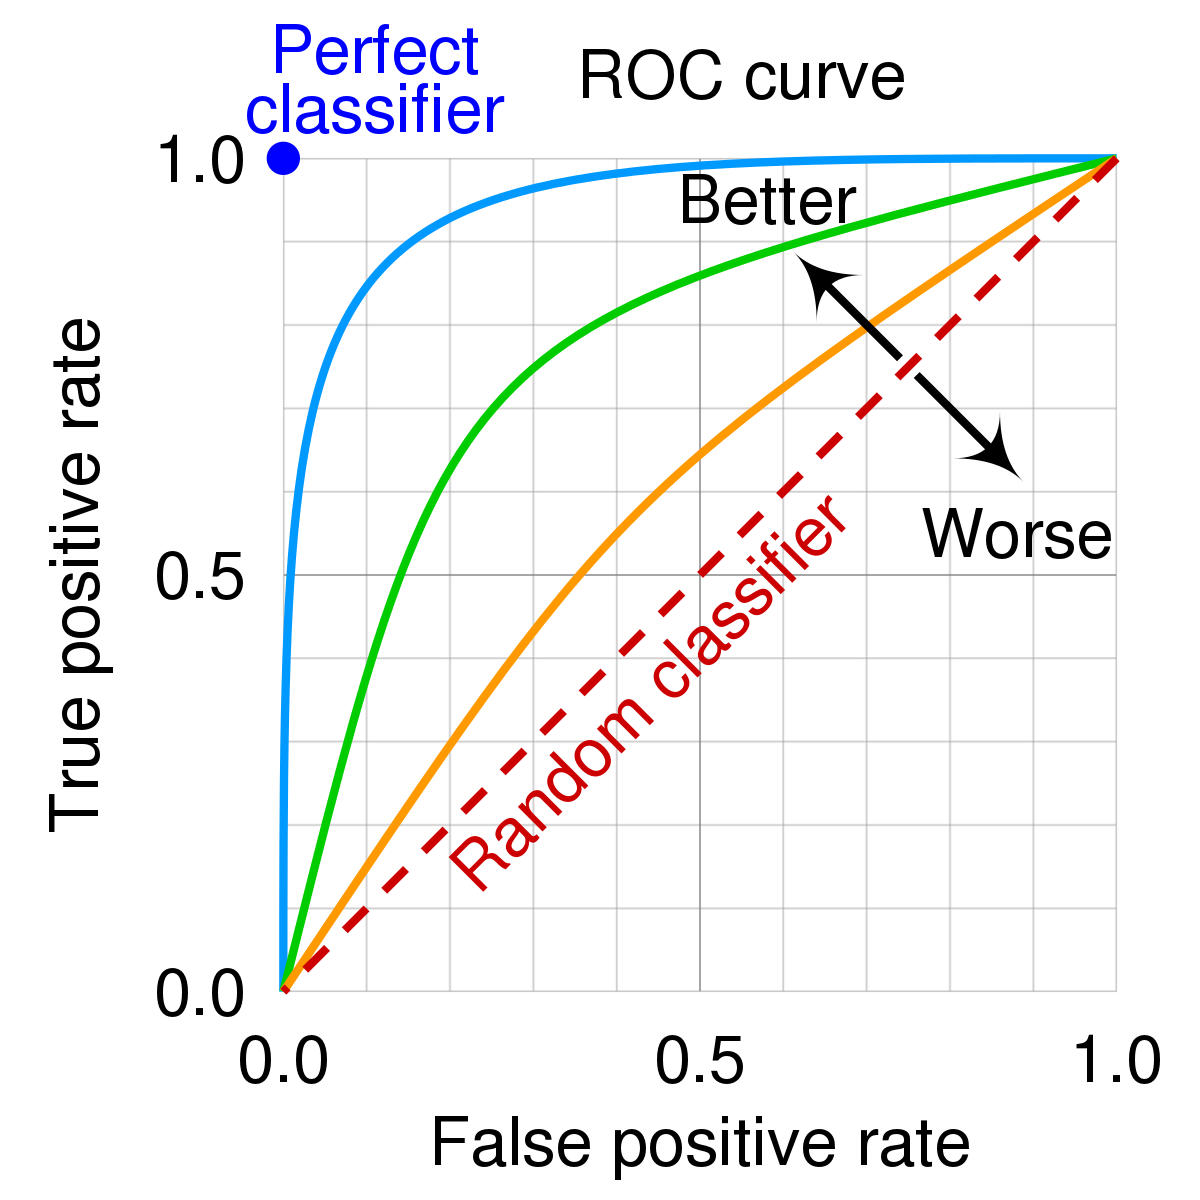

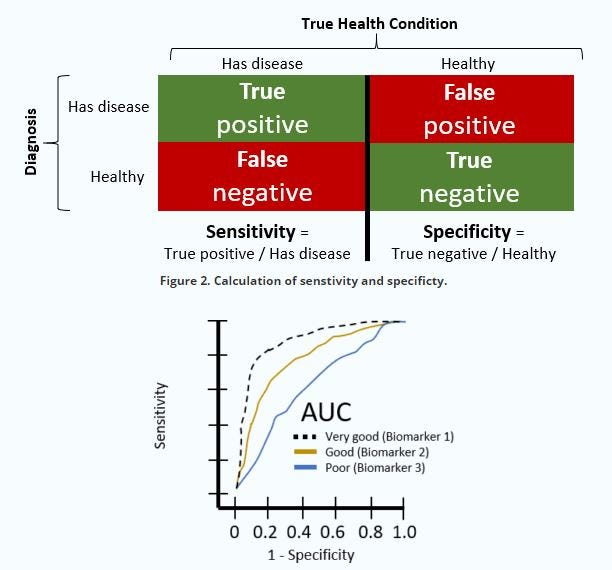

In [238]:
pred_original = model1.predict(X_test)
pred_poly = model2.predict(X_test_1)
pred_selected =model3.predict(X_test_2)

### Model Performance 

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc

In [142]:
print("Decision Tree Model Performance for original X")
print("Accuracy", accuracy_score(y_test, pred_original))
print("Precision", precision_score(y_test, pred_original, average='micro'))
print("Recall", recall_score(y_test, pred_original, average='micro'))         
print(classification_report(y_test, pred_original))

Decision Tree Model Performance for original X
Accuracy 0.5930769230769231
Precision 0.5930769230769231
Recall 0.5930769230769231
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.20      0.26      0.22        43
           5       0.60      0.66      0.63       402
           6       0.67      0.58      0.62       597
           7       0.55      0.61      0.58       215
           8       0.40      0.39      0.39        36
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1300
   macro avg       0.35      0.36      0.35      1300
weighted avg       0.60      0.59      0.60      1300



C:\Users\thaku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\thaku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\thaku\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [144]:
print("Decision Tree Model Performance for X_poly")
print("Accuracy", accuracy_score(y_test_1, pred_poly))
print("Precision", precision_score(y_test_1, pred_poly, average='micro'))
print("Recall", recall_score(y_test_1, pred_poly, average='micro'))         
print(classification_report(y_test_1, pred_poly))

Decision Tree Model Performance for X_poly
Accuracy 0.6038461538461538
Precision 0.6038461538461538
Recall 0.6038461538461538
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.20      0.21      0.20        43
           5       0.61      0.67      0.64       402
           6       0.66      0.62      0.64       597
           7       0.58      0.55      0.57       215
           8       0.40      0.39      0.39        36
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.35      0.35      0.35      1300
weighted avg       0.61      0.60      0.60      1300



In [146]:
print("Decision Tree Model Performance for X_selected")
print("Accuracy", accuracy_score(y_test_2, pred_selected))
print("Precision", precision_score(y_test_2, pred_selected, average='micro'))
print("Recall", recall_score(y_test_2, pred_selected, average='micro'))         
print(classification_report(y_test_2, pred_selected))

Decision Tree Model Performance for X_selected
Accuracy 0.5930769230769231
Precision 0.5930769230769231
Recall 0.5930769230769231
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.13      0.14      0.14        43
           5       0.61      0.66      0.63       402
           6       0.66      0.61      0.64       597
           7       0.55      0.56      0.56       215
           8       0.34      0.33      0.34        36
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1300
   macro avg       0.33      0.33      0.33      1300
weighted avg       0.60      0.59      0.59      1300



In [148]:
conf_mat_original = confusion_matrix(y_test, pred_original)

In [150]:
conf_mat_original

array([[  0,   0,   2,   4,   0,   0,   0],
       [  2,  11,  17,  10,   2,   1,   0],
       [  2,  20, 267,  91,  19,   3,   0],
       [  6,  21, 134, 348,  77,  11,   0],
       [  0,   2,  18,  58, 131,   6,   0],
       [  0,   1,   4,   9,   8,  14,   0],
       [  0,   0,   0,   1,   0,   0,   0]], dtype=int64)

<Axes: >

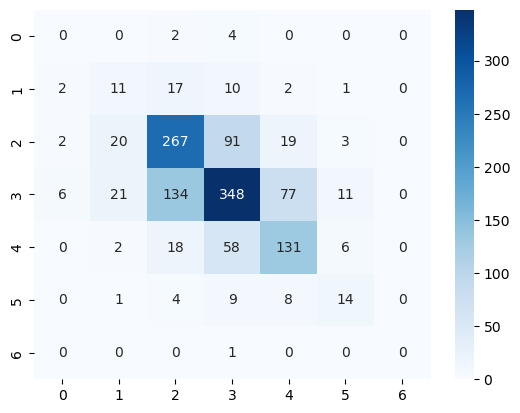

In [152]:
sns.heatmap(conf_mat_original, annot= True, fmt='d', cmap='Blues')

C:\Users\thaku\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


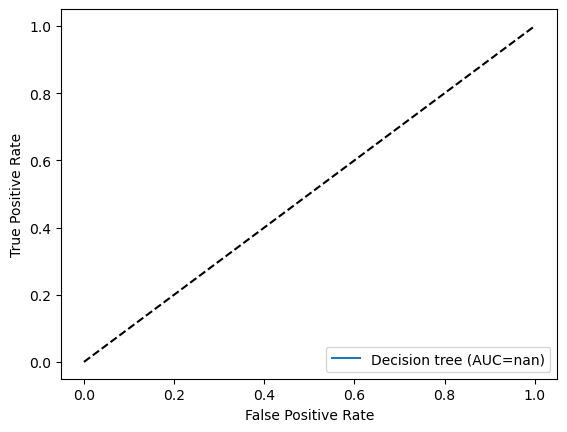

In [153]:
y_pred_prob = model1.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:,1], pos_label=2)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = "Decision tree (AUC=%0.2f)" % roc_auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [311]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(30)
X_pca = pca.fit_transform(X_poly)


# learning curve

In [291]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor

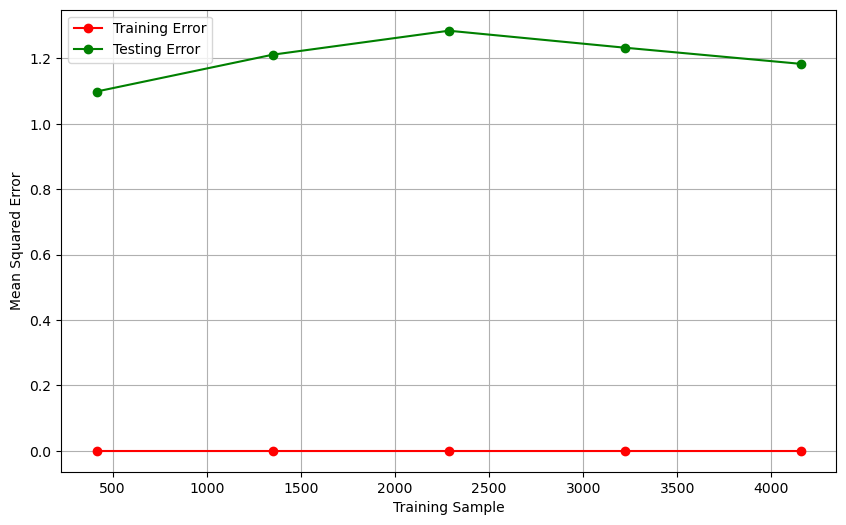

In [293]:
def plot_learning_curve(estimator, X_train, y_train, cv=None, train_sizes=np.linspace(0.1,1.0,5)):
    train_size, train_score, test_score = learning_curve(estimator, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_score_mean = -np.mean(train_score, axis=1)
    test_score_mean = -np.mean(test_score, axis=1)
    plt.figure(figsize=(10,6))
    plt.plot(train_size,train_score_mean, 'o-', color='red', label ='Training Error')
    plt.plot(train_size,test_score_mean, 'o-', color='green', label ='Testing Error')
    plt.xlabel("Training Sample")
    plt.ylabel("Mean Squared Error")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

regressor = DecisionTreeRegressor()
plot_learning_curve(regressor, X_train, y_train, cv=5)


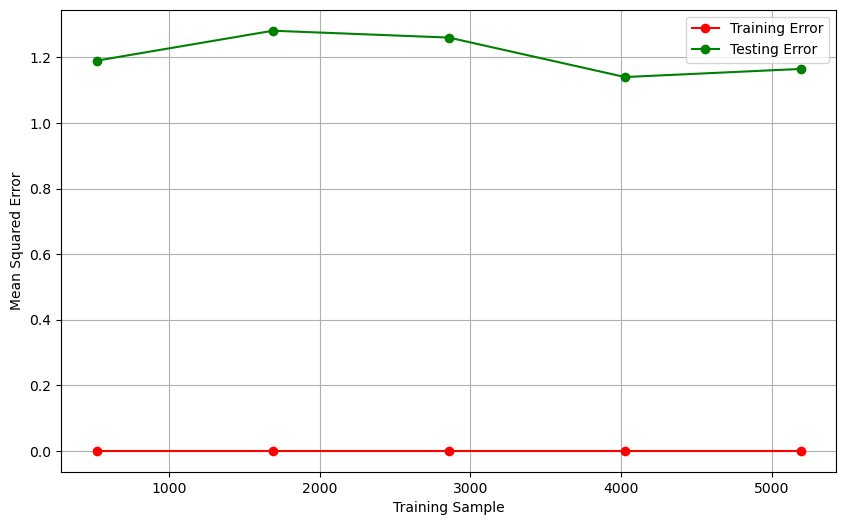

In [295]:
plot_learning_curve(regressor, X, y, cv=5)

# Feature Importance Analysis

In [157]:
importance = model1.feature_importances_

In [159]:
importance

array([0.07106859, 0.09902734, 0.07602776, 0.07332311, 0.07015453,
       0.09656812, 0.09010926, 0.07536251, 0.10753447, 0.09642644,
       0.14439788])

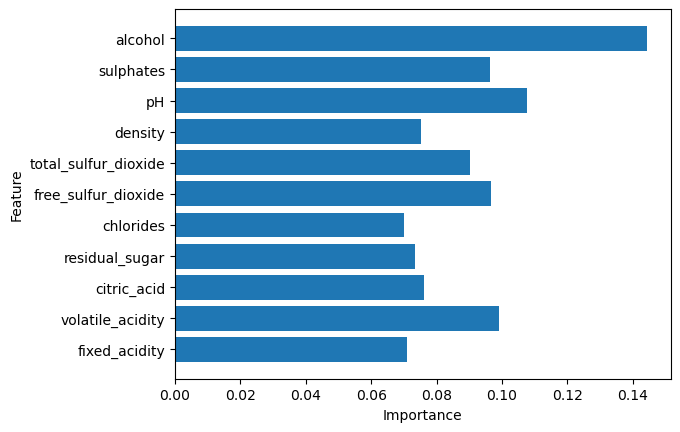

In [161]:
plt.barh(X.columns, importance)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

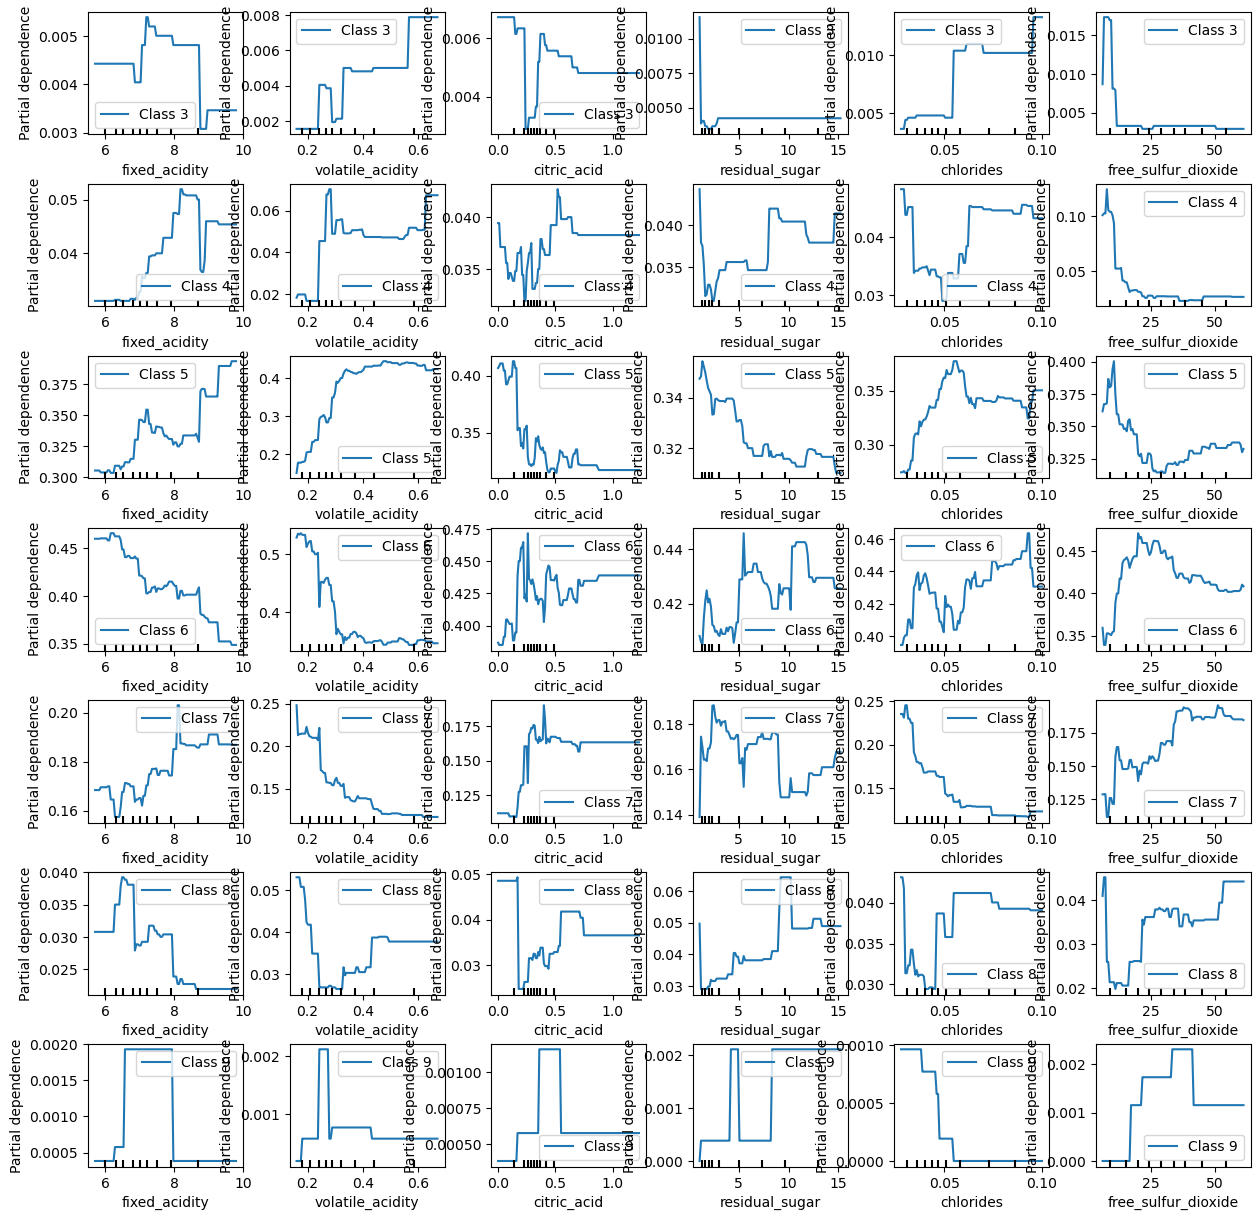

In [177]:
from sklearn.inspection import PartialDependenceDisplay
features = [0, 1, 2, 3, 4, 5]
# Use the class labels from the model
targets = model1.classes_

fig, ax = plt.subplots(len(targets), len(features), figsize=(15, 15))
for i, target in enumerate(targets):
    for j, feature in enumerate(features):
        display = PartialDependenceDisplay.from_estimator(
            model1, 
            X_train, 
            [feature], 
            target=target, 
            ax=ax[i, j], 
            line_kw={"label": f"Class {target}"}
        )

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


### shap analysis

In [299]:
!pip install shap

In [305]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

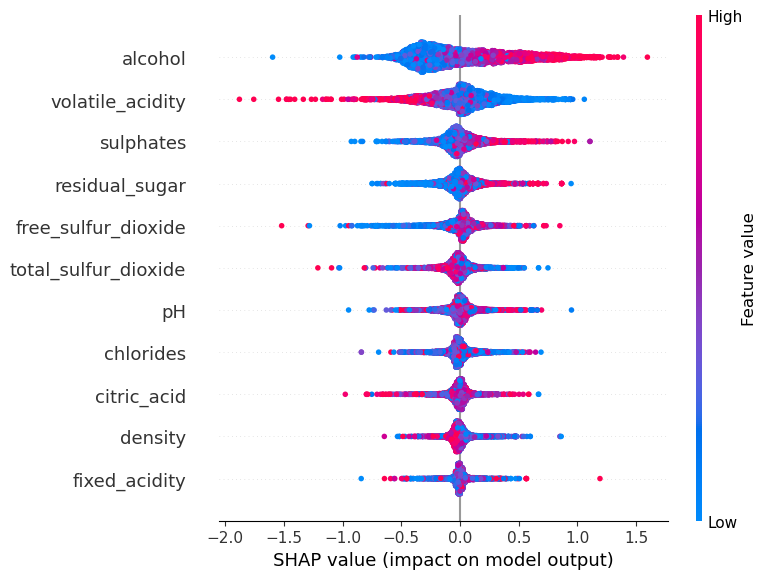

In [307]:
shap.summary_plot(shap_values, X, feature_names=X.columns)

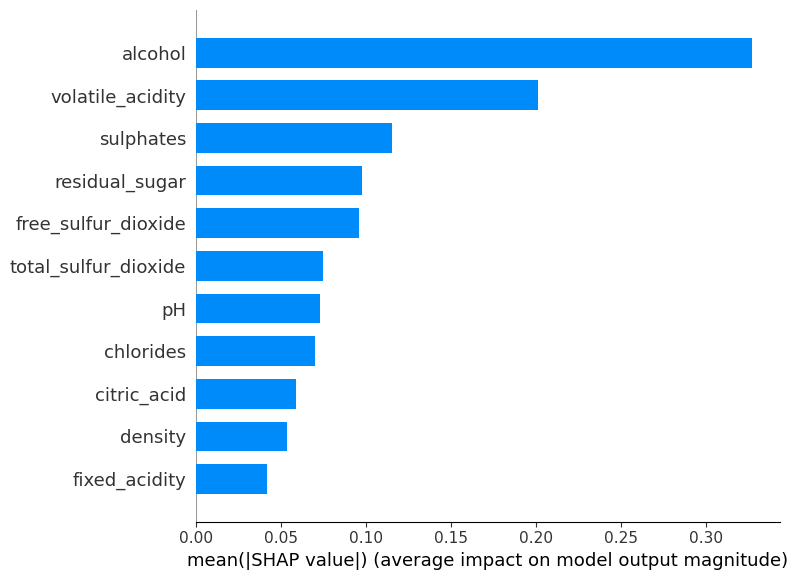

In [309]:
shap.summary_plot(shap_values, X, plot_type="bar", feature_names=X.columns)